필요한 모듈 불러오기
- `pandas`, `numpy`, `matplotlib.pyplot`, (`sklearn`)
- warning 제거

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from scipy import stats
from matplotlib import cm

plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#f5f5f5'
warnings.filterwarnings('ignore')

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']


In [2]:
# 데이터 체크
df = pd.read_csv("bike.csv", encoding='cp949')

exported = df.rename(columns={'대여구분코드':'요금제', '연령대코드':'연령대'})
exported.drop(columns=['대여일자', '대여소번호', '대여소명'], inplace=True)

from pathlib import Path
filepath = Path('./out.csv')
exported.to_csv(filepath, index=False, encoding="utf-8-sig")

exported.head(20)


,요금제,성별,연령대,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,일일(비회원),\N,기타,1,29.34,0.26,1140.00,6
1,일일(회원),M,50대,19,458.11,4.44,19280.00,117
2,정기,\N,20대,12,330.13,3.39,14626.81,75
3,정기,\N,60대,4,113.53,1.02,4410.69,22
4,정기,M,20대,2,13.69,0.07,320.00,4
5,정기,M,40대,12,622.21,4.54,19557.91,120
6,정기,M,50대,12,684.05,5.70,24518.37,293
7,정기,M,60대,4,146.80,1.18,5078.18,147
8,정기,M,기타,1,237.45,2.02,8690.00,41
9,일일(회원),M,40대,15,1573.39,13.56,58430.19,329


In [3]:
# 결측값 제거
df.dropna(inplace=True)
df.drop(df[df['성별'] == '\\N'].index, inplace=True)
df.drop(df[df['연령대코드'] == '기타'].index, inplace=True)
# df.isna().sum()

# column rename
df.rename(columns={'대여구분코드':'요금제', '연령대코드':'연령대'}, inplace=True)

# remove unnecessary columns
df.drop(columns=['대여일자', '대여소번호', '대여소명', '운동량', '탄소량', '이동거리(M)'], inplace=True)

In [4]:
# 1번 이용할 때마다 평균 이용시간 계산
df['1건당 이용시간'] = df['이용시간(분)'] / df['이용건수']
df.head()

,요금제,성별,연령대,이용건수,이용시간(분),1건당 이용시간
1,일일(회원),M,50대,19,117,6.157895
4,정기,M,20대,2,4,2.000000
5,정기,M,40대,12,120,10.000000
6,정기,M,50대,12,293,24.416667
7,정기,M,60대,4,147,36.750000


In [5]:
df['성별'] = df['성별'].str.upper()
x = df.groupby('요금제')['이용건수'].mean()
# df['대여구분코드'].value_counts()
x

요금제
10분이용권      1.000000
단체          3.780150
일일(비회원)     1.153846
일일(회원)     17.792520
정기         61.063476
Name: 이용건수, dtype: float64

[Text(0.5, 1.0, '요금제별 따릉이 평균 이용건수')]

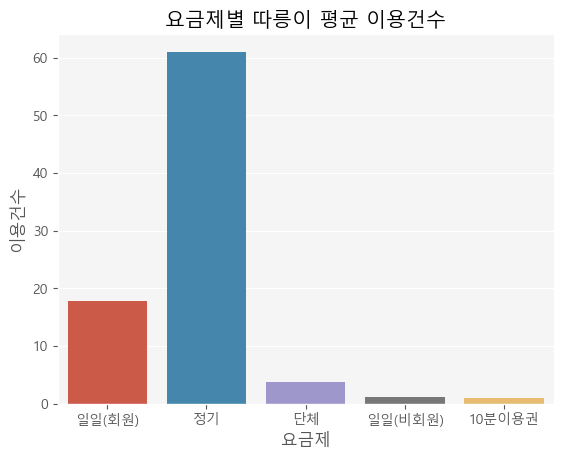

In [6]:
bar_mem = sns.barplot(data=df, x='요금제', y='이용건수', ci=None)
bar_mem.set(title='요금제별 따릉이 평균 이용건수')

Text(0, 0.5, '')

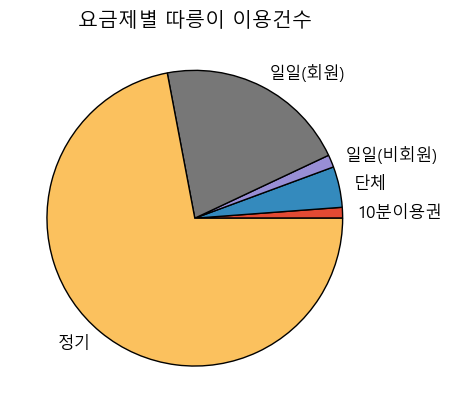

In [7]:
plt.title("요금제별 따릉이 이용건수")
pie_mem = df.groupby('요금제')['이용건수'].mean().plot(kind="pie", ylabel="시간", fontsize=12, wedgeprops={"edgecolor":"k", "linewidth":1})
pie_mem.set_ylabel('')

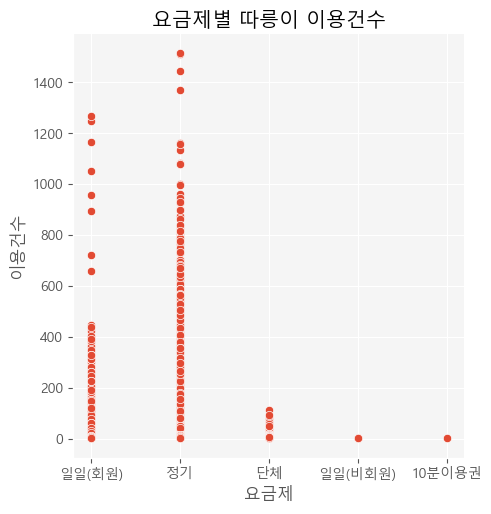

In [8]:
rel_mem = sns.relplot(data=df, x='요금제', y='이용건수')
rel_mem.set(title="요금제별 따릉이 이용건수")

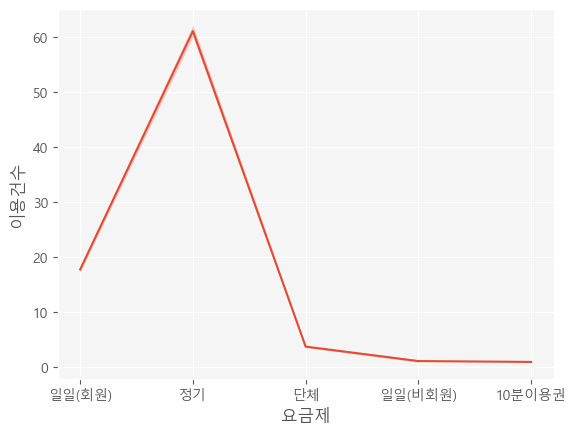

In [9]:
line_mem = sns.lineplot(data=df, x='요금제', y='이용건수')

[Text(0.5, 1.0, '요금제별 따릉이 이용건수')]

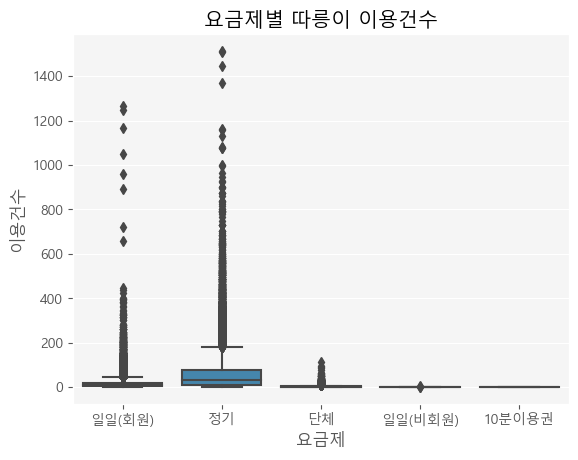

In [10]:
box_mem = sns.boxplot(data=df, x='요금제', y='이용건수')
box_mem.set(title="요금제별 따릉이 이용건수")

[Text(0.5, 1.0, '연령대별 따릉이 평균 이용건수')]

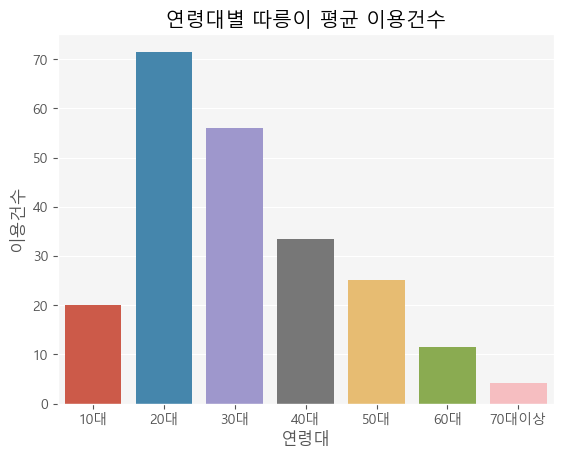

In [11]:
age_sorted = df.sort_values(by="연령대")
# age_sorted
box_age = sns.barplot(data=age_sorted, x='연령대', y='이용건수', ci=None)
box_age.set(title="연령대별 따릉이 평균 이용건수")

Text(0.5, 1.0, '성별 따릉이 이용건수')

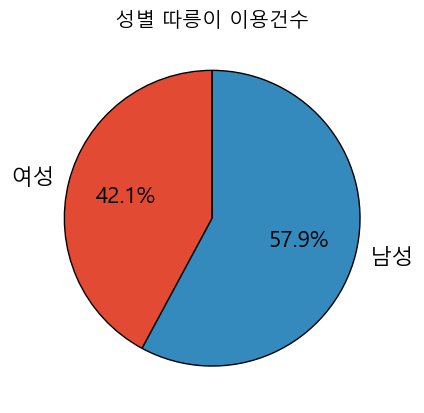

In [12]:
eda4_label = ['여성', '남성']
pie_sex = df.groupby('성별')['이용건수'].mean().plot(kind='pie', labels=eda4_label, ylabel='따릉이 평균 이용건수', fontsize=16, wedgeprops={'edgecolor':'k', 'linewidth':1}, autopct='%.1f%%', startangle=90, 
textprops={'fontsize':16})
pie_sex.set_ylabel('')
pie_sex.set_title('성별 따릉이 이용건수')
# pie_mem = df.groupby('요금제')['이용건수'].mean().plot(kind="pie", ylabel="시간", fontsize=12, wedgeprops={"edgecolor":"k", "linewidth":1})

In [19]:
box_sex = sns.boxplot(data=df, x="성별", y="이동거리(M)")

ValueError: Could not interpret input '이동거리(M)'

<BarContainer object of 5 artists>

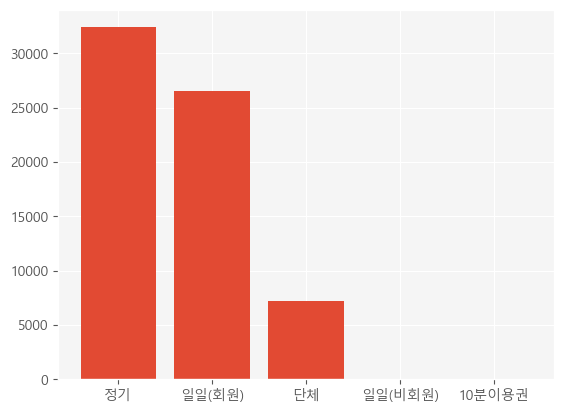

In [13]:
prices = df['요금제'].value_counts()
tmp_label = prices.index.tolist()
tmp_val = prices.values
plt.bar(tmp_label, tmp_val)

## 프로젝트 개요 (Project 1, 2, 3)
- 데이터의 주제, 데이터가 설명하고 있는 항목, 특징
- 기존 Super AI 프로젝트에는 없는 부분: *문제 정의하기* 부분을 둘로 나누기
    - 데이터에 대한 전반적인 설명 (Project 1, 2, 3)
    - 데이터를 분석, 활용하여 풀어갈 문제 제시 (문제 정의)
- 이미지, 사진 첨부

## 문제 정의
- 문제를 제기하게 된 배경
- 데이터 분석을 통해 해결할 수 있을 만한 3~4가지 정도의 문제 정의

## 데이터 수집 1, 2
- 객관식 : *데이터를 수집하는 방법으로 가장 알맞지 않은 것은?*
- Drag & Drop : 
    - 데이터를 보고 각 문제마다 어떤 특성들을 사용해야 하는지 고르기
    - 문제 해결에 사용할 만한 데이터 고르기

## 데이터 전처리 1, 2
- 결측값 확인, 처리 : 대체? 삭제? 대체한다면 0 / 평균값?
- 이상값 확인, 처리 :
    - Incomplete, Wrong : 올바르게 고치기 (D&D)
    - Redundant : 반복된 데이터 찾아서 삭제 (D&D)

## EDA 1, 2, 3, 4
문제 정의 부분의 문제 순차적으로 하나씩 풀어가기 
- 막대 or 누적 막대 그래프, 원, 꺾은선, 산점도, 박스 그래프 최대한 활용 : 데이터별로 활용할만한 그래프 종류가 다르니 여러가지 실험해보고 결정
